<a href="https://colab.research.google.com/github/KomalMano/Story/blob/master/7_Neural_Network_For_Handwritten_Digits_Classification_%7C_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
#we r going to give keras lib that r something load using this particular line here 
#what will do? It will load train and test digits sets into these variables
(X_train, y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
#So let's see how many samples we have
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
#Let's check the samples
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

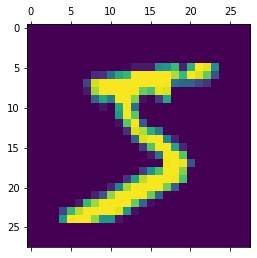

In [7]:
plt.matshow(X_train[0])

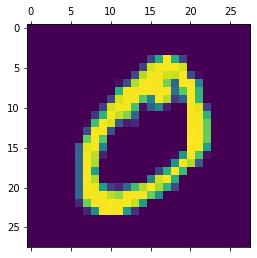

In [8]:
plt.matshow(X_train[1])

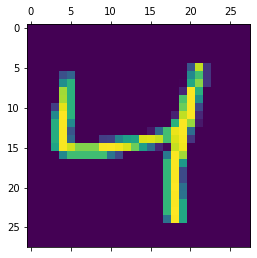

In [9]:
plt.matshow(X_train[2])

In [10]:
y_train[2]

4

In [11]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [12]:
X_train.shape
#1D has 60000 which is number of its samples
#2nd and 3rd are each induividual image

(60000, 28, 28)

In [13]:
#our values are not scaled often in ML we r need to scaled the values. I will try to scale this
#Every value in range of 1 to 255 range . If i divide this whole array by 255 it will be scaled from 0 to 1
X_train = X_train / 255
X_test = X_test / 255

In [14]:
X_train[0]
#now the value is b/w 1 and 0

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [15]:
#Now we r going to flatten our data set bcz we have to 28 by 28 into a single dimentional array
#in pandas there is called reshapes.
#1st is 1D and 2nd is 2D
#let's store into a variable
X_train_flattenend = X_train.reshape(len(X_train),28*28)
X_train_flattenend.shape
#len(X_train) which is 60,000 and 28*28

(60000, 784)

In [16]:
X_test_flattenend = X_test.reshape(len(X_test),28*28)
X_test_flattenend.shape

(10000, 784)

In [17]:
X_train_flattenend[0]
#here we convert the 2D array into a 1D array

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [18]:
#now we r going to creare to a simple neural network
#which simple layer input layer and output layer
#and the way u create this in tensorflow in keras
#Sequential means we having a stck off layers in my neural network
#Since it is a stack it will acpt every layer as 1 element
#1st element has input but keras has this API
#Dense means all the neurons in the layer connected to the other layer is called Dense.
#So we r creating a dense layer here.
#put in dense layer is input shape which is 784
#and output shape is 10. 10 means basically give the output which is 10 neuron
#need to see that the activation function is sigmoid
#we r going to store into variable called model
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid') #that's it we define the Neural Network. we have very simple NN                
])
#now i have to compile them the NN so pass the bunch of arguments
#1st is optimizer . So I'm going to use adam optimizer. Optimizer is use to train efficiently
#when the backward propogation and training is going on. Optimizer is going to reach to allow u optima in efficient way.

#2nd parameter is loss. I have use in ML 2nd tut and i use MSE(mean square error) loss function
#here i m going to pass that's mean our output class is categorical .Bcz we have categories 0 to 9.
#and sparse means our output variable which is y train  is actually an integer num
#if it has 1 hot encoded array u can use sparse_categorical_crossentropy
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattenend,y_train,epochs=5)
#X_train_flattenend it is flatten
#y_train is not a flatten
#fit means where the training is actually happen this
#epochs means num of iterations where the NN r going to run the training

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4675 - accuracy: 0.8776
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3036 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2833 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2736 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2667 - accuracy: 0.9254


In [19]:
#Scalling is atechnique that improve the accuracy of ML model .


#lets try to avaluate the test data set 
model.evaluate(X_test_flattenend, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2655 - accuracy: 0.9272


[0.2655441462993622, 0.9272000193595886]

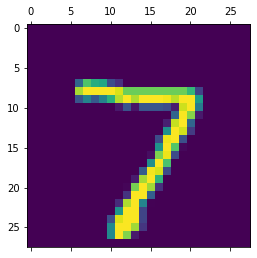

In [20]:
#I have to show the predicted image
plt.matshow(X_test[0])

In [21]:
#now i m just going to sample prediction
y_predicted = model.predict(X_test_flattenend)
y_predicted[0]

array([2.0981729e-02, 2.5258097e-07, 5.4921716e-02, 9.4606566e-01,
       1.9688308e-03, 9.3990147e-02, 1.4021500e-06, 9.9968517e-01,
       7.9249889e-02, 5.8584708e-01], dtype=float32)

In [22]:
#i want to get the maximum value
#and it will print the max value 
np.argmax(y_predicted[0])

7

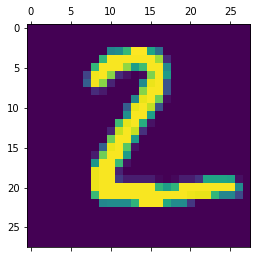

In [23]:
plt.matshow(X_test[1])

In [24]:
y_predicted = model.predict(X_test_flattenend)
y_predicted[1]
#this is a whole values

array([4.7136256e-01, 9.4392896e-03, 9.9942994e-01, 3.9065778e-01,
       6.3098521e-10, 8.1599760e-01, 8.8696486e-01, 4.0770965e-13,
       1.8241137e-01, 2.8929370e-09], dtype=float32)

In [25]:
np.argmax(y_predicted[1])

2

In [26]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [27]:
y_test[:5]
#this is a integer values

array([7, 2, 1, 0, 4], dtype=uint8)

In [28]:
#now we will just build a confusion matrix
#labels=y_test this is basically ur truth data 
#and here u want to supply ur predictions
#but this can not be y_predicted bcz this is expecting the real labels
# now we will convert this into concrete class labels .So 
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    2,    0,    6,    5,    2,    1,    0],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   4,    9,  926,   19,    9,    5,   11,    8,   37,    4],
       [   3,    0,   19,  919,    2,   25,    1,    9,   23,    9],
       [   1,    1,    2,    1,  916,    0,   12,    3,   10,   36],
       [   8,    3,    3,   30,    8,  789,   11,    2,   31,    7],
       [  11,    3,    8,    1,    8,   14,  909,    2,    2,    0],
       [   1,   10,   24,    6,    9,    0,    0,  936,    2,   40],
       [   6,    8,    7,   17,    9,   32,    8,    7,  871,    9],
       [  11,    7,    1,   10,   26,    8,    0,   12,    5,  929]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

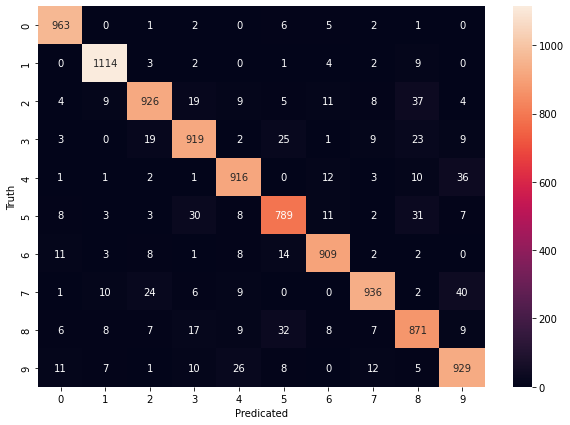

In [29]:
#now print this confusion matrix in some visually in appeling way
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicated')
plt.ylabel('Truth')

In [30]:
#now i will add a hidden in this
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattenend, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2697 - accuracy: 0.9233
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1250 - accuracy: 0.9636
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0868 - accuracy: 0.9744
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0666 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0525 - accuracy: 0.9836


In [31]:
model.evaluate(X_test_flattenend, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0809 - accuracy: 0.9758


[0.08092112094163895, 0.9757999777793884]

Text(69.0, 0.5, 'Truth')

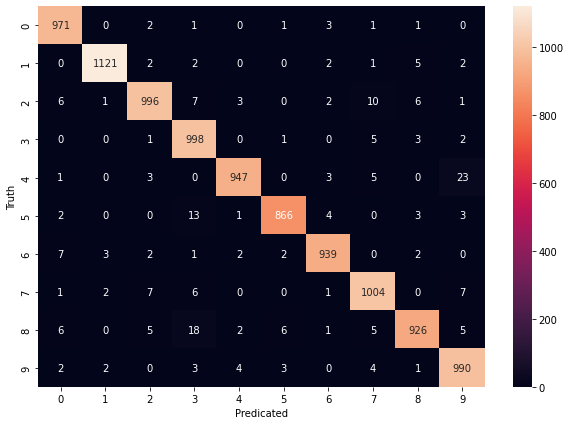

In [37]:
y_predicted = model.predict(X_test_flattenend)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicated')
plt.ylabel('Truth')

In [38]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train, y_train, epochs=5)
#we want to get X_train and y_train so we get flatten layer before and get these 2 train set.

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2792 - accuracy: 0.9204
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1256 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0879 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0667 - accuracy: 0.9794
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0544 - accuracy: 0.9828
